# **Non-Separable classification Using MLP:  Multi-Font Character Recognition**

### IE 7860

Priyanka Patil

## **Dataset**
The data consists of 6 fonts (Courier, New York, Chicago, Geneva, Times, and Venice), was collected and quantized by Lee [1988]. A brief summary of the data collection method is presented here [Logar et al., 1993]:<br>
1. The image of the letter is normalized to an 18 x 18 character matrix, where the line thickness is one and the image is represented by 0's (background) and 1's (foreground).
2. Fourteen properties similar to those proposed by Fujii and Morita (see reference) were extracted from each image. Each property is a 3 x 3 matrix, thus, for each image, a 14 x 9 matrix is generated. This is the X matrix for that image. A property recognition matrix, Y, is constructed for each image and is also a 14 x 9 matrix. It is chosen arbitrarily and is as simple as possible. W is a 9 x 9 filter matrix which maps X to Y and can be found from: W = X Y, where X the pseudo-inverse of X.
3. A 3 x 3 window is moved from upper left to lower right over the character image. The 9 elements in the window are multiplied by the matrix W. If the output matches a row of Y, say row k, the kth place in the count matrix is incremented by the weighting factor of that property.<br>

Thus, the count matrix for a character contains the number of exact template matches, weighted by position. The result is 156 (26 x 6) 14-element vectors.

### **Train Data**
Train data contains Courier, New York, and Chicago Fonts; 78 Patterns in Total (26 x 3).<br>
- Length of the Input Per Pattern: 14<br>
- Length of the Output Per Pattern: 26 (Binary Values Check Alphabet Match: 0 denotes "no match" and 1 denotes "match")<br>

Sequence:
- Pattern #1: Courier Font Alphabet A
- Pattern #2: New York Font Alphabet A
- Pattern #3: Chicago Font Alphabet A
- Pattern #4: Courier Font Alphabet B
- Pattern #5: New York Font Alphabet B
- Pattern #6: Chicago Font Alphabet B....
- Pattern #76: Courier Font Alphabet Z
- Pattern #77: New York Font Alphabet Z
- Pattern #78: Chicago Font Alphabet Z

### **Test Data**
Test data contains Geneva, Times, and Venice Fonts; 78 Patterns in Total (26 x 3).<br>
- Length of the Input: 14<br>
- Length of the Output Per Pattern: 26 (Binary Values Check Alphabet Match: 0 denotes "no match" and 1 denotes "match") Length of the Pattern: 40<br>

Sequence:
- Pattern #1: Geneva Font Alphabet A
- Pattern #2: Times Font Alphabet A 
- Pattern #3: Venice Font Alphabet A
- Pattern #4: Geneva Font Alphabet B
- Pattern #5: Times Font Alphabet B
- Pattern #6: Venice Font Alphabet B ...
- Pattern #76: Geneva Font Alphabet Z
- Pattern #77: Times Font Alphabet Z
- Pattern #78: Venice Font Alphabet Z

## **Methodology**

Methodology that we'll follow is as below using MLP:

1. Data Reviewing
2. Data Preprocessing
3. Build a baseline model and optimize parameters
4. Build and Train Model using K-Fold cross validation technique and optimized parameters
5. Model Evaluation is done by checking accuracy
6. Conclusion

Since, we have sparse dataset, we'll use stratified shuffle split method for cross-validation to split data.

## **Load, Review and Pre-process data**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df_train = pd.read_excel('data.xlsx' ,sheet_name = 'train', header=None)
df_test = pd.read_excel('data.xlsx' ,sheet_name = 'test', header=None)
print('Train data:')
display(df_train.head())
print()
print('Test data:')
display(df_test.head())

Train data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0



Test data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,5,0,6,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,14,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0
4,27,12,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Separate input features from output data
X_train_df = df_train.iloc[:, :14]
y_train_df = df_train.iloc[:, 14:]
X_test_df = df_test.iloc[:, :14]
y_test_df = df_test.iloc[:, 14:]

Box Plot of training data: 


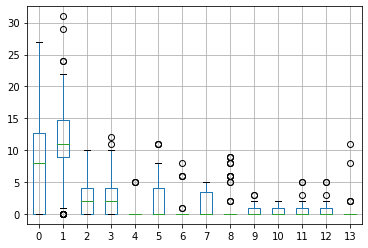


Density Plot of overall training data:


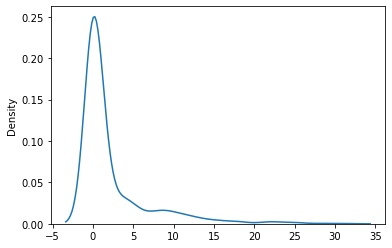

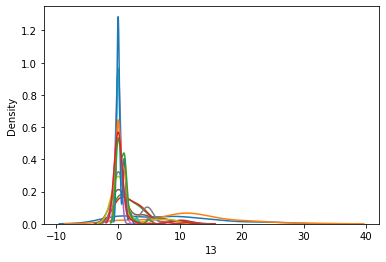

Box Plot of testing data: 


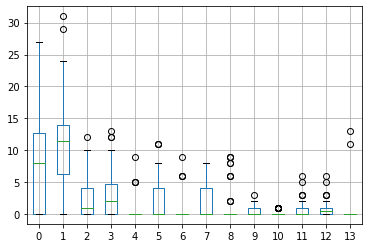


Density Plot of overall testing data:


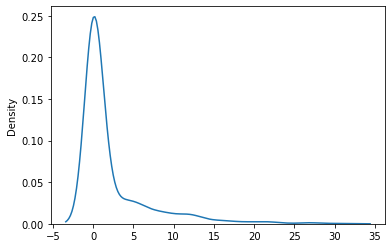

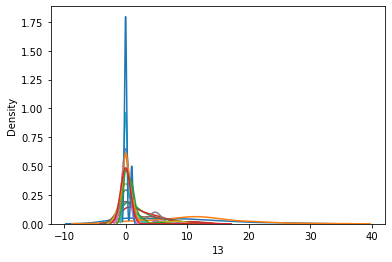

In [4]:
# Check whether data needs normalization
## Checking training data
### Box plot
print('Box Plot of training data: ')
X_train_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall training data:')
sns.distplot(X_train_df, hist=False)
plt.show()


### Density plot of each feature in training data
for i in X_train_df:
    sns.distplot(X_train_df[i], hist = False, label = i)
plt.show()

## Checking testing data
### Box plot
print('Box Plot of testing data: ')
X_test_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall testing data:')
sns.distplot(X_test_df, hist=False)
plt.show()

### Density plot of each feature in testing data
for i in X_test_df:
    sns.distplot(X_test_df[i], hist = False, label = i)
plt.show()

In [81]:
# Data Normalization
## Normalize training data
normalized_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

## Normalize testing data
normalized_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()


Box Plot of training data: 


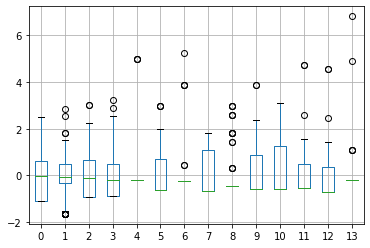


Density Plot of overall training data:


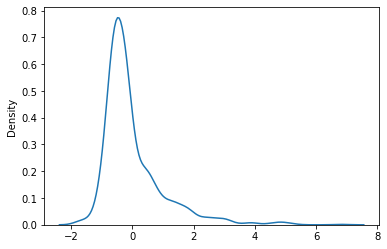

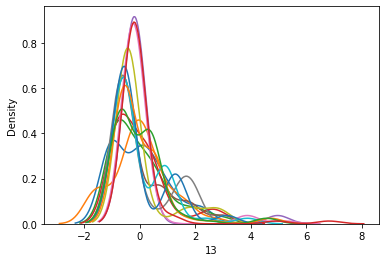

Box Plot of testing data: 


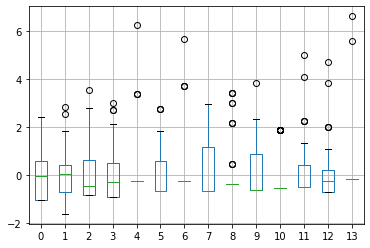


Density Plot of overall testing data:


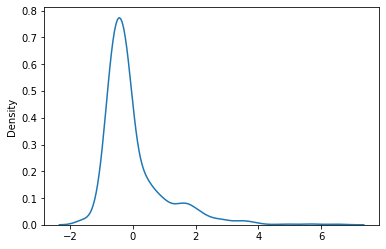

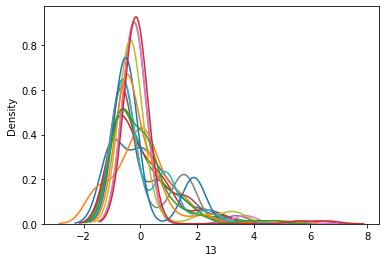

In [6]:
# Check normalized data
## Checking training data
### Box plot
print('Box Plot of training data: ')
normalized_X_train_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall training data:')
sns.distplot(normalized_X_train_df, hist=False)
plt.show()


### Density plot of each feature in training data
for i in normalized_X_train_df:
    sns.distplot(normalized_X_train_df[i], hist = False, label = i)
plt.show()

## Checking testing data
### Box plot
print('Box Plot of testing data: ')
normalized_X_test_df.boxplot()
plt.show()
print()

### Density plot
print('Density Plot of overall testing data:')
sns.distplot(normalized_X_test_df, hist=False)
plt.show()

### Density plot of each feature in testing data
for i in normalized_X_test_df:
    sns.distplot(normalized_X_test_df[i], hist = False, label = i)
plt.show()

Since, we have data normalized, it can be converted to arrays to use futher for training and testing purposes.

In [7]:
# Convert dataframes into numpy array
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values 

# Printing dimensions
#print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

## Training data
count = 1
cls = 1
y_cls = []
for i in range (104):
    if count == 4:
        count = 1
        cls +=1
    else:
        y_cls.append(cls)
        count += 1

y_labeled = np.asarray(y_cls)
print(y_labeled)


[ 1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16 16
 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23 24 24 24
 25 25 25 26 26 26]


## **Build Model**

### **Build Model and Tune Hyper-Parameters**

In [8]:
#clf = KerasClassifier(make_model)
#cv = StratifiedShuffleSplit(n_splits = 14, test_size=0.6, random_state = 1)
#param_grid = {'epochs' : [50,100,200,300], 'hidden_size':  [10, 20, 64], 'optimizer':['Adam','SGD']}
#grid = GridSearchCV(clf, param_grid = param_grid, cv = cv)
#grid.fit(X_train, y_train)
#print(grid.best_params_)

### **Train Model - using the best parameters**

In [77]:
# Training the model using best parameters
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam


def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(80, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(70, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

In [78]:
# load dataset
#X, y = get_dataset()
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_train, y_train , verbose=0, epochs=280)
print(model.metrics_names)

['loss', 'accuracy']


In [79]:
# Best score on training dataset
train_score = model.evaluate(X_train, y_train, verbose=0) 
print('Train loss:', train_score[0]) 
print('Train accuracy:', train_score[1]) 

Train loss: 0.006871329620480537
Train accuracy: 1.0


In [80]:
# Best score on testing dataset
test_score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', test_score[0]) 
print('Test accuracy:', test_score[1]) 

Test loss: 0.038848429918289185
Test accuracy: 0.8974359035491943
